# Advertising Sales Prediction (Linear Regression)

# Problem Statement
Use relevant Machine learning model to predict total sales using features like money spend on Advertising/Marketing individual fields.

## Project Overview

This project aims to build a machine learning model to predict total sales based on advertising spending across different channels: TV, Radio, and Newspaper. The goal is to understand the impact of advertising budgets on sales revenue and identify the most effective advertising channels.

## Dataset

The dataset used in this project contains information on advertising budgets for TV, Radio, and Newspaper, and the corresponding sales revenue.

## Analysis and Modeling

1.  **Data Loading and Exploration:** The dataset was loaded and initial exploratory data analysis (EDA) was performed to understand the distribution of each feature and the relationships between advertising channels and sales.
2.  **Data Preprocessing:**
    *   Missing values and duplicates were checked (none found).
    *   Outliers in the 'Newspaper' column were identified and handled using the Interquartile Range (IQR) method, replacing them with the median.
3.  **Feature Engineering and Selection:**
    *   Correlation analysis was performed using a heatmap to understand the linear relationships between variables.
    *   Regression plots were generated to visualize the relationship between each advertising channel and sales.
    *   Based on the analysis, 'TV', 'Radio', and 'Newspaper' were selected as features (independent variables) to predict 'Sales' (the target variable).
4.  **Model Building:** A Linear Regression model was chosen to predict sales.
5.  **Model Evaluation:** The model was trained on a split of the data and evaluated using metrics such as R-squared (Accuracy) and Mean Absolute Error to assess its performance.


## Technologies Used

*   Python
*   pandas
*   numpy
*   matplotlib
*   seaborn
*   scikit-learn
*   kagglehub

# Import basic libraries

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')

# load dataset


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/advertising-sales-dataset")

print("Path to dataset files:", path)



Using Colab cache for faster access to the 'advertising-sales-dataset' dataset.
Path to dataset files: /kaggle/input/advertising-sales-dataset


In [3]:

file_path = os.path.join(path, 'Advertising Budget and Sales.csv')
df = pd.read_csv(file_path)

In [4]:
df.head(10)

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.columns = ['TV', 'Radio', 'Newspaper', 'Sales']
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


# Domain Analysis
* Sales is the target
* Tv ,Radio and Newspaper are input varibles
* this data basically tells us about the total sales made by the company by investing certain amount on Tv , Radio and Newspaper Advertising

# Basic checks

In [6]:
#shape
df.shape

(200, 4)

In [7]:
#print all columns
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [8]:
#dtypes
df.dtypes

,0
TV,float64
Radio,float64
Newspaper,float64
Sales,float64


In [9]:
# describe
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
#information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# Insights
* Average sales made by company is 14.02m$
* Average amount spent on tv is more compared to Radio and Newspaper
* Maximum amount spent on tv advertising is more compared to Radio and Newspaper

# Exploratory Data Analysis

## univariate analysis
* Analysing single variable/column/feature
* check the distribution of each coloumn

<Axes: ylabel='Density'>

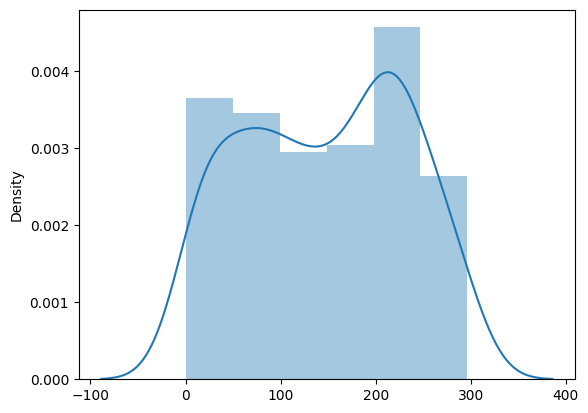

In [11]:
# Check distribution of TV
sns.distplot(x=df.TV)

<Axes: ylabel='Density'>

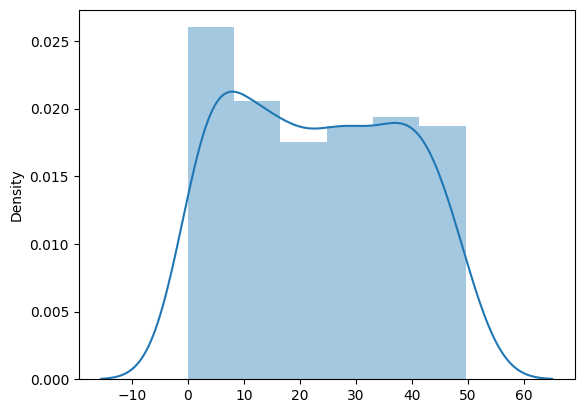

In [12]:
# Check distribution of Radio
sns.distplot(x=df.Radio)

<Axes: ylabel='Density'>

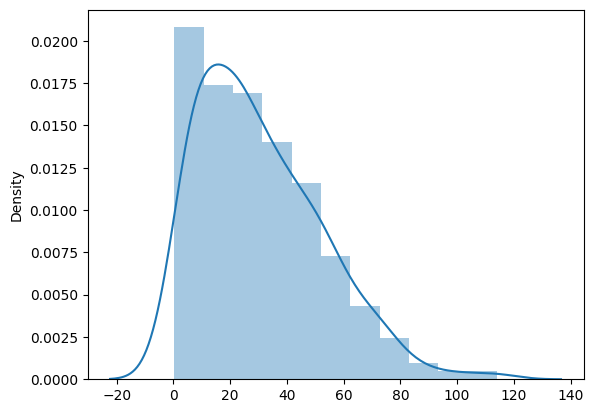

In [13]:
# Check distribution of Newspaper
sns.distplot(x=df.Newspaper)

<Axes: ylabel='Density'>

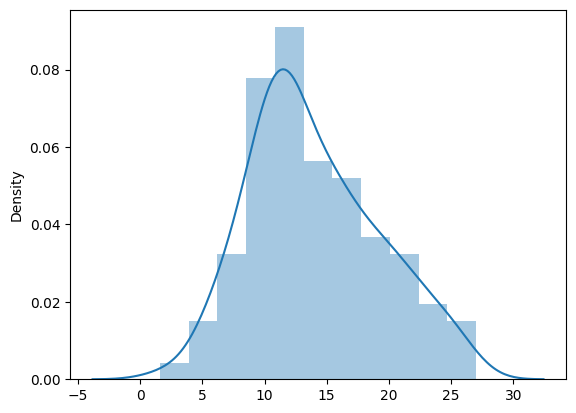

In [14]:
# Check distribution of Sales
sns.distplot(x=df.Sales)

# Insights
* sales is representing Normal distribution
* TV ,Radio and News paper are representing Skewness/Not normal

## Bivariate Analysis
Analysing Multiple variables

<Axes: xlabel='TV', ylabel='Sales'>

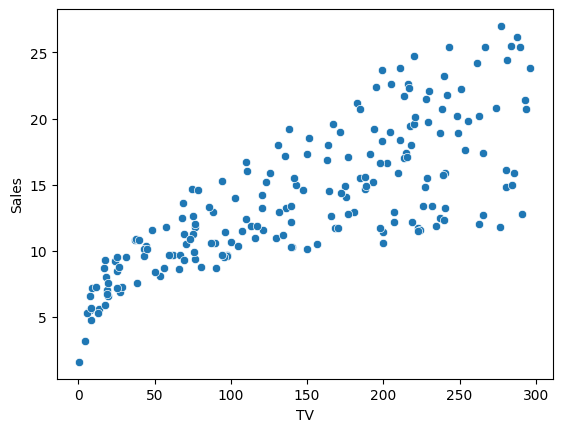

In [15]:
# Analyse how amount spent on TV impact sales
sns.scatterplot(data=df,x='TV',y='Sales')

# Insights
* As we increase the amount of money on TV advertising then sales will increase.
* there is a high correlation between TV and sales.
* there is a positive relationship between TV and Sales


<Axes: xlabel='Radio', ylabel='Sales'>

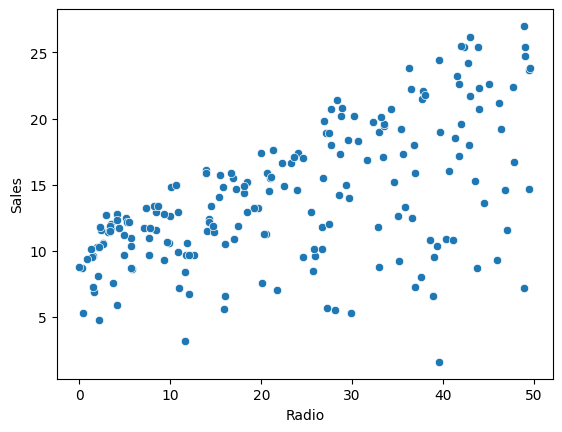

In [16]:
# Analyse how amount spent on Radio impact sales
sns.scatterplot(data=df,x='Radio',y='Sales')

# Insights
* There is no much trend or strong relationship between Radio and Sales.

<Axes: xlabel='Newspaper', ylabel='Sales'>

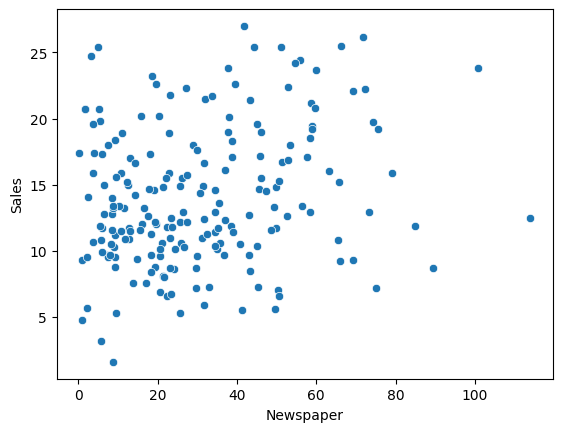

In [17]:
# Analyse how amount spent on Newspaper impact sales
sns.scatterplot(data=df,x='Newspaper',y='Sales')

# Insights
* There is no relationship between newspaper ad sales
* investing more or less on newspaper advertising will yield very less sales

## Multivariate Analysis

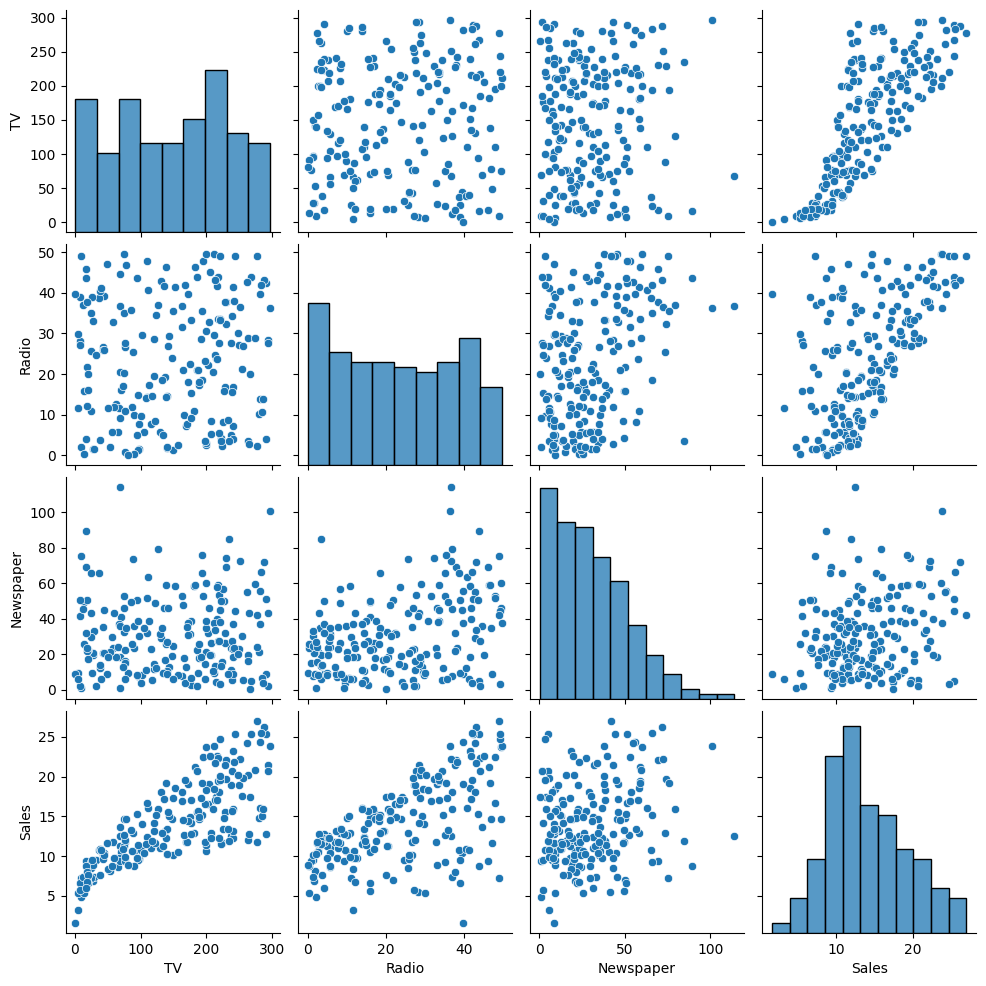

In [18]:
# Plotting the distribution of columns
sns.pairplot(df)

## Overall Insights
* TV is the best field for advertising the product so that the company can yield more sales
* investing in radio will also yield some good sales but investing Newspaper is not really good idea.

# Data preprocessing

In [19]:
# check for missing values
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [20]:
# check for duplicates
df.duplicated().sum()

np.int64(0)

<Axes: >

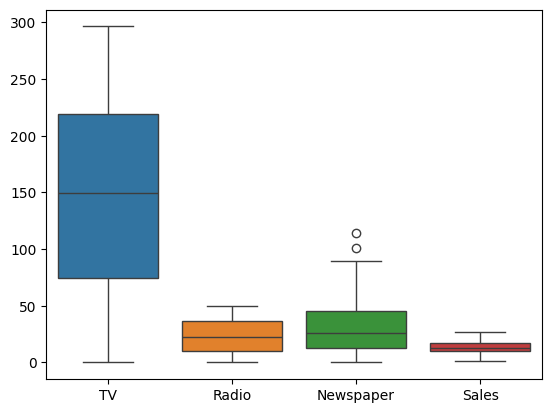

In [21]:
#check for outliers
sns.boxplot(data=df)

In [22]:
# use IQR method for outliers
# find Q1 and Q3
Q1=df['Newspaper'].quantile(0.25)
Q3=df['Newspaper'].quantile(0.75)
# find IQR
IQR=Q3-Q1
# Find lower limit and Upper limit
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
df.loc[df['Newspaper']>upper_limit]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [23]:
df.loc[df['Newspaper']>upper_limit,"Newspaper"]=df['Newspaper'].median()

#Feature Engineering
* drop irrelevant columns
* Selecting best features
* drop the column which has very correlation with target varibles

<Axes: >

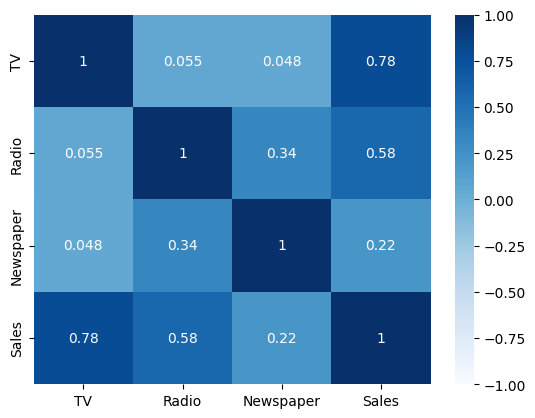

In [24]:
sns.heatmap(df.corr(),vmin=-1,vmax=1,cmap='Blues',annot=True)

Text(0.5, 1.0, 'The Regression Line Of ad Newspaper Vs Sales')

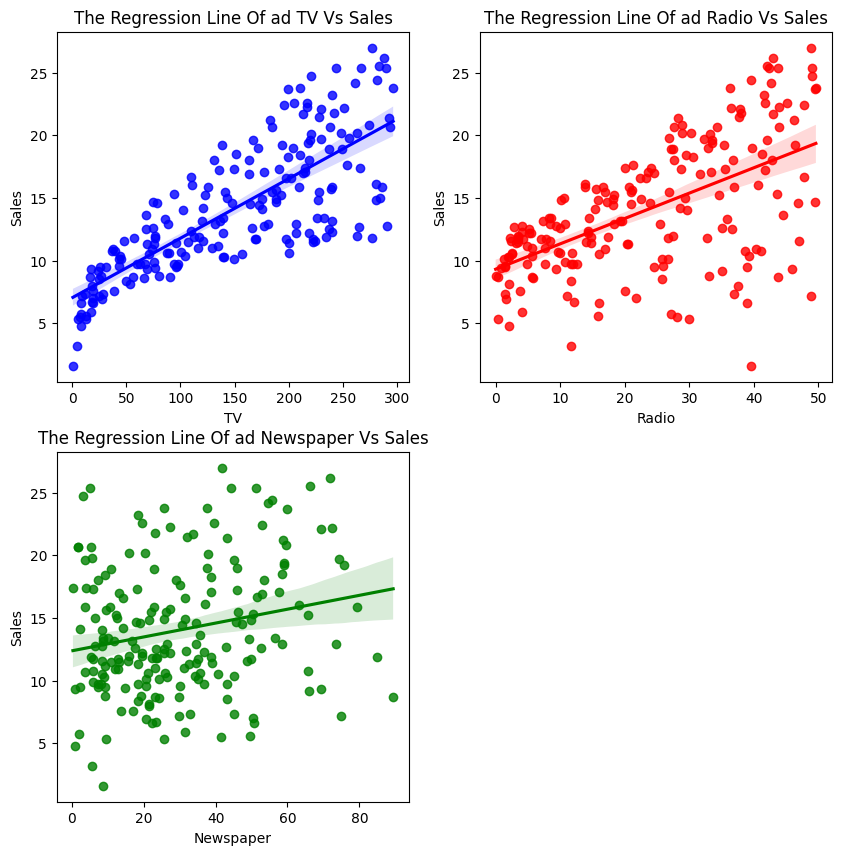

In [25]:
# Plotting the regression line
from matplotlib import figure
plt.figure(figsize =(10,10))
plt.subplot(2,2,1)
sns.regplot(data=df,x='TV',y='Sales',color='b').set_title('The Regression Line Of ad TV Vs Sales')
plt.subplot(2,2,2)
sns.regplot(data=df,x='Radio',y='Sales',color='r').set_title('The Regression Line Of ad Radio Vs Sales')
plt.subplot(2,2,3)
sns.regplot(data=df,x='Newspaper',y='Sales',color='g').set_title('The Regression Line Of ad Newspaper Vs Sales')

# Heat map analysis
# linearity
* we include columns which has high correlation with target.
* we drop columns which has less correlation with target
# Little or no multicollinearity
* we include columns which has less correlation among each other
* we drop one of the column if two input variable have high correlation.

# Features selection

In [26]:
# Features selection
x=df[['TV','Radio','Newspaper']]
y=df['Sales']

# Creating The Model

In [27]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
#using function train_test_split()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

print(f'x_train : {x_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'x_test : {x_test.shape}')
print(f'y_test : {y_test.shape}')

x_train : (160, 3)
y_train : (160,)
x_test : (40, 3)
y_test : (40,)


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [29]:
# Create LinearRegression object
reg=LinearRegression()
# train model
reg.fit(x_train,y_train)

LinearRegression()

In [30]:
#Predict the response for test dataset
pred=reg.predict(x_test)

In [31]:
# Actual Vs Predicted
ac = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
ac.head(10)

,Actual,Predicted
11,17.4,17.284393
99,17.2,16.747233
128,24.7,21.990672
175,27.0,24.596413
1,10.4,12.115948
111,21.8,21.026041
90,11.2,10.160152
177,11.7,12.340002
88,12.9,11.691605
187,17.3,17.026328


# **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [32]:
# Accuracy of Model
print(f'Accuracy : {reg.score(x_test,y_test)*100} %')

Accuracy : 90.86633358695457 %


In [33]:
from sklearn import metrics
print('Mean Absolute Error:',
      metrics.mean_absolute_error(y_test, pred))

Mean Absolute Error: 1.2108016418776075


## Conclusion

The analysis revealed that TV advertising has the strongest positive correlation with sales, while Newspaper advertising has the weakest. The Linear Regression model built in this project provides a means to predict sales based on advertising expenditure, which can help in optimizing advertising strategies.
